This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59**
- Part 2: Mon 20.2 at 23:59**
- Part 3: Mon 6.3 at 23:59**

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [1]:
import uuid
# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
print ("The id code is: ",end="")
print (uuid.uuid1())

The id code is: 04ef8a8b-a142-11ed-a371-70a8d3975279


# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total)
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV)
- plot one example image of each rice species, including the contour

## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel
    - Variance for each RGB color channel
    - Skewness for each RGB color channel
    - Kurtosis for each RGB color channel
    - Entropy for each RGB color channel
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV)
- Plot one example image of each rice species including the fitted ellipse
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse
    - the minor axis length of the ellipse
    - area inside the contour (you can use e.g. *contourArea* from OpenCV)
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV)
    - roundness
    - aspect ratio
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns. <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder.

# Part 2

## Data exploration (2 p)

- Standardize the data
- Plot a boxplot of each featurelabels
- Plot histogram of each feature, use a different color for each class
- Plot pairplot (each feature against each feature and the label against each feature)
- Discuss your findings from the above figures, e.g. can you spot features which might be very useful in predicting the correct class? 
- Fit PCA using two components
- Plot the PCA figure with two components, color the data points according to their species
- Can you see any clusters in PCA? Does this figure give you any clues, how well you will be able to classify the image types? Explain.
- How many PCA components are needed to cover 99% of the variance?
- Make clear figures, use titles and legends for clarification

## Model selection (2 p)

Select the best model for each classifier. Use 5-fold repeated cross validation with 3 repetitions (*RepeatedKFold* from sklearn). You can choose the hyperparameter ranges to use (i.e. from which values the best hyperparameters are selected if they are not stated below.) <br>

- k Nearest Neighbors classifier: hyperparameter k
- random forest: hyperparameters max_depth and max_features
- MLP: use one hidden layer and Early stopping. Hyperparameters:
    - number of neurons in the hidden layer
    - activation function: logistic sigmoid function and rectified linear unit function
    - solver: stochastic gradient descent and adam
    - validation_fraction: 0.1 and 0.5

For each classifier:
- Report the best hyperparameter or the best combination of hyperparameters. <br>
- Plot the accuracy versus the hyperparameter/hyperparameter combination and highlight the best value. <br>

For random forest model, report the feature importance for each feature. Which features seem to be the most important? Does this correspond with the observations you made in the data exploration? <br>
Ponder the model selection process. What things should be considered when selecting the model to be used?

# Data exploration

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt 
import math
import seaborn as sns
import sklearn.decomposition as SD
from tqdm import tqdm

## Data

In [2]:
training_data = pd.read_csv('../training_data/training_data.csv', index_col = [0])
training_data.head()

rice_type                                 path      r_mean      g_mean  \
0   arborio   ../data/Arborio\Arborio (9204).jpg  222.522289  222.462998   
1   arborio     ../data/Arborio\Arborio (95).jpg  225.105370  225.438161   
2   arborio   ../data/Arborio\Arborio (6523).jpg  207.078867  208.550371   
3   arborio   ../data/Arborio\Arborio (7523).jpg  196.267586  195.825107   
4   arborio  ../data/Arborio\Arborio (11106).jpg  200.921386  200.854356   

       b_mean  r_variance  g_variance  b_variance  r_skewness  g_skewness  \
0  224.158894  414.157721  420.233364  331.755208   -1.451926   -1.451582   
1  231.659615  441.078683  460.979968  397.579497   -1.039958   -0.999778   
2  218.762061  317.646307  338.739471  344.251594   -0.909045   -0.852550   
3  205.800233  207.988053  209.938308  231.463681   -1.117349   -1.113135   
4  203.404185  296.996302  299.498530  290.685397   -0.693292   -0.694011   

   ...  b_kurtosis  r_entropy  g_entropy  b_entropy  major_axis_length (px)  \
0  ...    3.853837   6.031748   6.041130   5.840202              129.655731   
1  ...    2.295804   6.098831   6.128041   5.903111              135.751190   
2  ...    1.606971   5.986432   6.035016   6.021399              142.041885   
3  ...    2.283707   5.726940   5.732542   5.769262              112.533409   
4  ...    0.476972   5.963724   5.970757   5.946620              144.727615   

   minor_axis_lenth (px)  contour_area (px)  contour_perimeter (px)  \
0              66.700142             6648.0              343.220343   
1              69.416695             7221.0              357.019333   
2              73.650620             8065.5              378.433546   
3              57.882843             5013.5              295.722870   
4              74.547760             8303.0              377.102593   

   roundness  aspect_ratio  
0   0.709177      1.943860  
1   0.711908      1.955599  
2   0.707721      1.928591  
3   0.720412      1.944158  
4   0.733712      1.941408  

[5 rows x 23 columns]

## Standardize the data

In [29]:
features = training_data.copy().drop(['rice_type', 'path'], axis=1)

cols = features.columns

scaler = StandardScaler()
scale = scaler.fit_transform(features) 

#back to dataframe 
features = pd.DataFrame(scale)
features.columns = cols

display(features.head())

training_data_scaled = pd.DataFrame(training_data['rice_type'])
training_data_scaled = training_data_scaled.join(features)

display(training_data_scaled.head())

labels = training_data['rice_type']

display(labels.head())

r_mean    g_mean    b_mean  r_variance  g_variance  b_variance  \
0  0.903478  0.468699 -0.376299    1.609257    1.590499    1.133324   
1  1.193838  0.767847  0.272219    1.901135    2.028030    1.961155   
2 -0.832487 -0.930193 -0.842913    0.562879    0.715431    1.290483   
3 -2.047763 -2.209699 -1.963602   -0.626038   -0.667616   -0.127980   
4 -1.524638 -1.704015 -2.170766    0.338991    0.294068    0.616815   

   r_skewness  g_skewness  b_skewness  r_kurtosis  ...  b_kurtosis  r_entropy  \
0   -0.398200   -0.129804    0.432525   -0.558665  ...   -0.788546   1.011422   
1    0.185925    0.391209    0.884403   -0.844676  ...   -1.019225   1.205410   
2    0.371545    0.560991    1.126394   -0.883037  ...   -1.121212   0.880376   
3    0.076194    0.260488    0.937813   -0.600138  ...   -1.021016   0.129980   
4    0.677459    0.743815    1.406361   -1.095999  ...   -1.288518   0.814711   

   g_entropy  b_entropy  major_axis_length (px)  minor_axis_lenth (px)  \
0   0.943312   0.930546               -1.155969               0.976376   
1   1.158406   1.051936               -0.982381               1.214996   
2   0.928180   1.280185               -0.803233               1.586901   
3   0.179593   0.793663               -1.643583               0.201871   
4   0.769146   1.135892               -0.726748               1.665706   

   contour_area (px)  contour_perimeter (px)  roundness  aspect_ratio  
0          -0.261640               -0.911635   1.189391     -1.208987  
1           0.150479               -0.665492   1.213981     -1.198084  
2           0.757869               -0.283511   1.176273     -1.223169  
3          -1.437223               -1.758882   1.290571     -1.208710  
4           0.928686               -0.307252   1.410350     -1.211264  

[5 rows x 21 columns]

rice_type    r_mean    g_mean    b_mean  r_variance  g_variance  b_variance  \
0   arborio  0.903478  0.468699 -0.376299    1.609257    1.590499    1.133324   
1   arborio  1.193838  0.767847  0.272219    1.901135    2.028030    1.961155   
2   arborio -0.832487 -0.930193 -0.842913    0.562879    0.715431    1.290483   
3   arborio -2.047763 -2.209699 -1.963602   -0.626038   -0.667616   -0.127980   
4   arborio -1.524638 -1.704015 -2.170766    0.338991    0.294068    0.616815   

   r_skewness  g_skewness  b_skewness  ...  b_kurtosis  r_entropy  g_entropy  \
0   -0.398200   -0.129804    0.432525  ...   -0.788546   1.011422   0.943312   
1    0.185925    0.391209    0.884403  ...   -1.019225   1.205410   1.158406   
2    0.371545    0.560991    1.126394  ...   -1.121212   0.880376   0.928180   
3    0.076194    0.260488    0.937813  ...   -1.021016   0.129980   0.179593   
4    0.677459    0.743815    1.406361  ...   -1.288518   0.814711   0.769146   

   b_entropy  major_axis_length (px)  minor_axis_lenth (px)  \
0   0.930546               -1.155969               0.976376   
1   1.051936               -0.982381               1.214996   
2   1.280185               -0.803233               1.586901   
3   0.793663               -1.643583               0.201871   
4   1.135892               -0.726748               1.665706   

   contour_area (px)  contour_perimeter (px)  roundness  aspect_ratio  
0          -0.261640               -0.911635   1.189391     -1.208987  
1           0.150479               -0.665492   1.213981     -1.198084  
2           0.757869               -0.283511   1.176273     -1.223169  
3          -1.437223               -1.758882   1.290571     -1.208710  
4           0.928686               -0.307252   1.410350     -1.211264  

[5 rows x 22 columns]

0    arborio
1    arborio
2    arborio
3    arborio
4    arborio
Name: rice_type, dtype: object

## Plot a boxplot of each feature

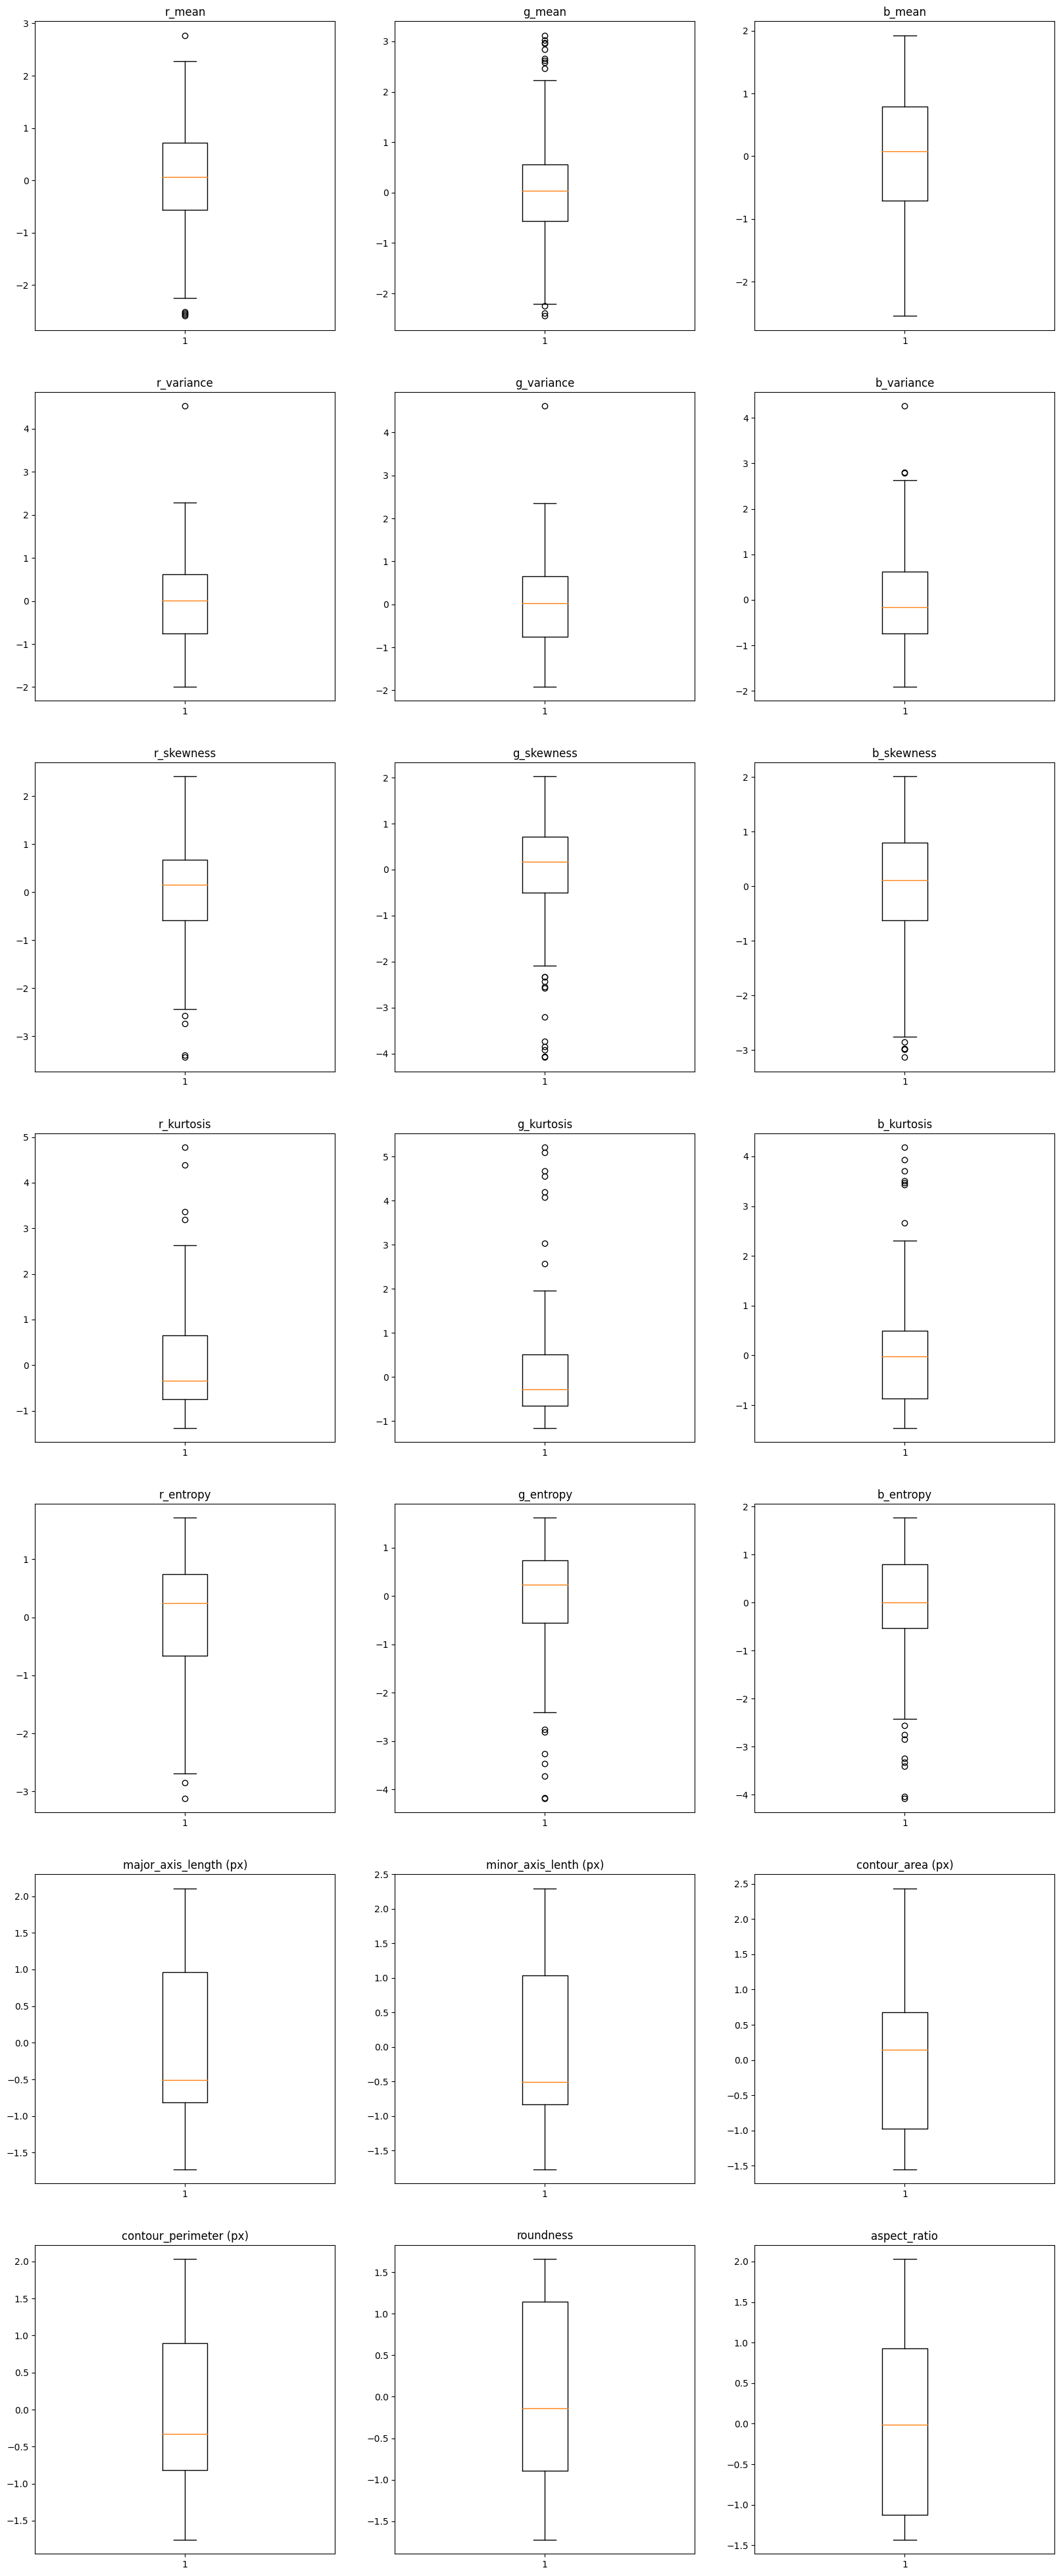

In [30]:
fig = plt.figure(figsize=(20, 50))

# setting values to rows and column variables
rows = math.ceil(len(cols)/3)
columns = 3

x = 0

for col in features.columns: 
    x = x + 1
    fig.add_subplot(rows, columns, x)

    plt.boxplot(features[col])
    plt.title(col)

plt.show(fig)

## Plot histogram of each feature, use a different color for each class

In [31]:
arborio = training_data_scaled.loc[training_data_scaled['rice_type'] == 'arborio']
basmati = training_data_scaled.loc[training_data_scaled['rice_type'] == 'basmati']
jasmine = training_data_scaled.loc[training_data_scaled['rice_type'] == 'jasmine']

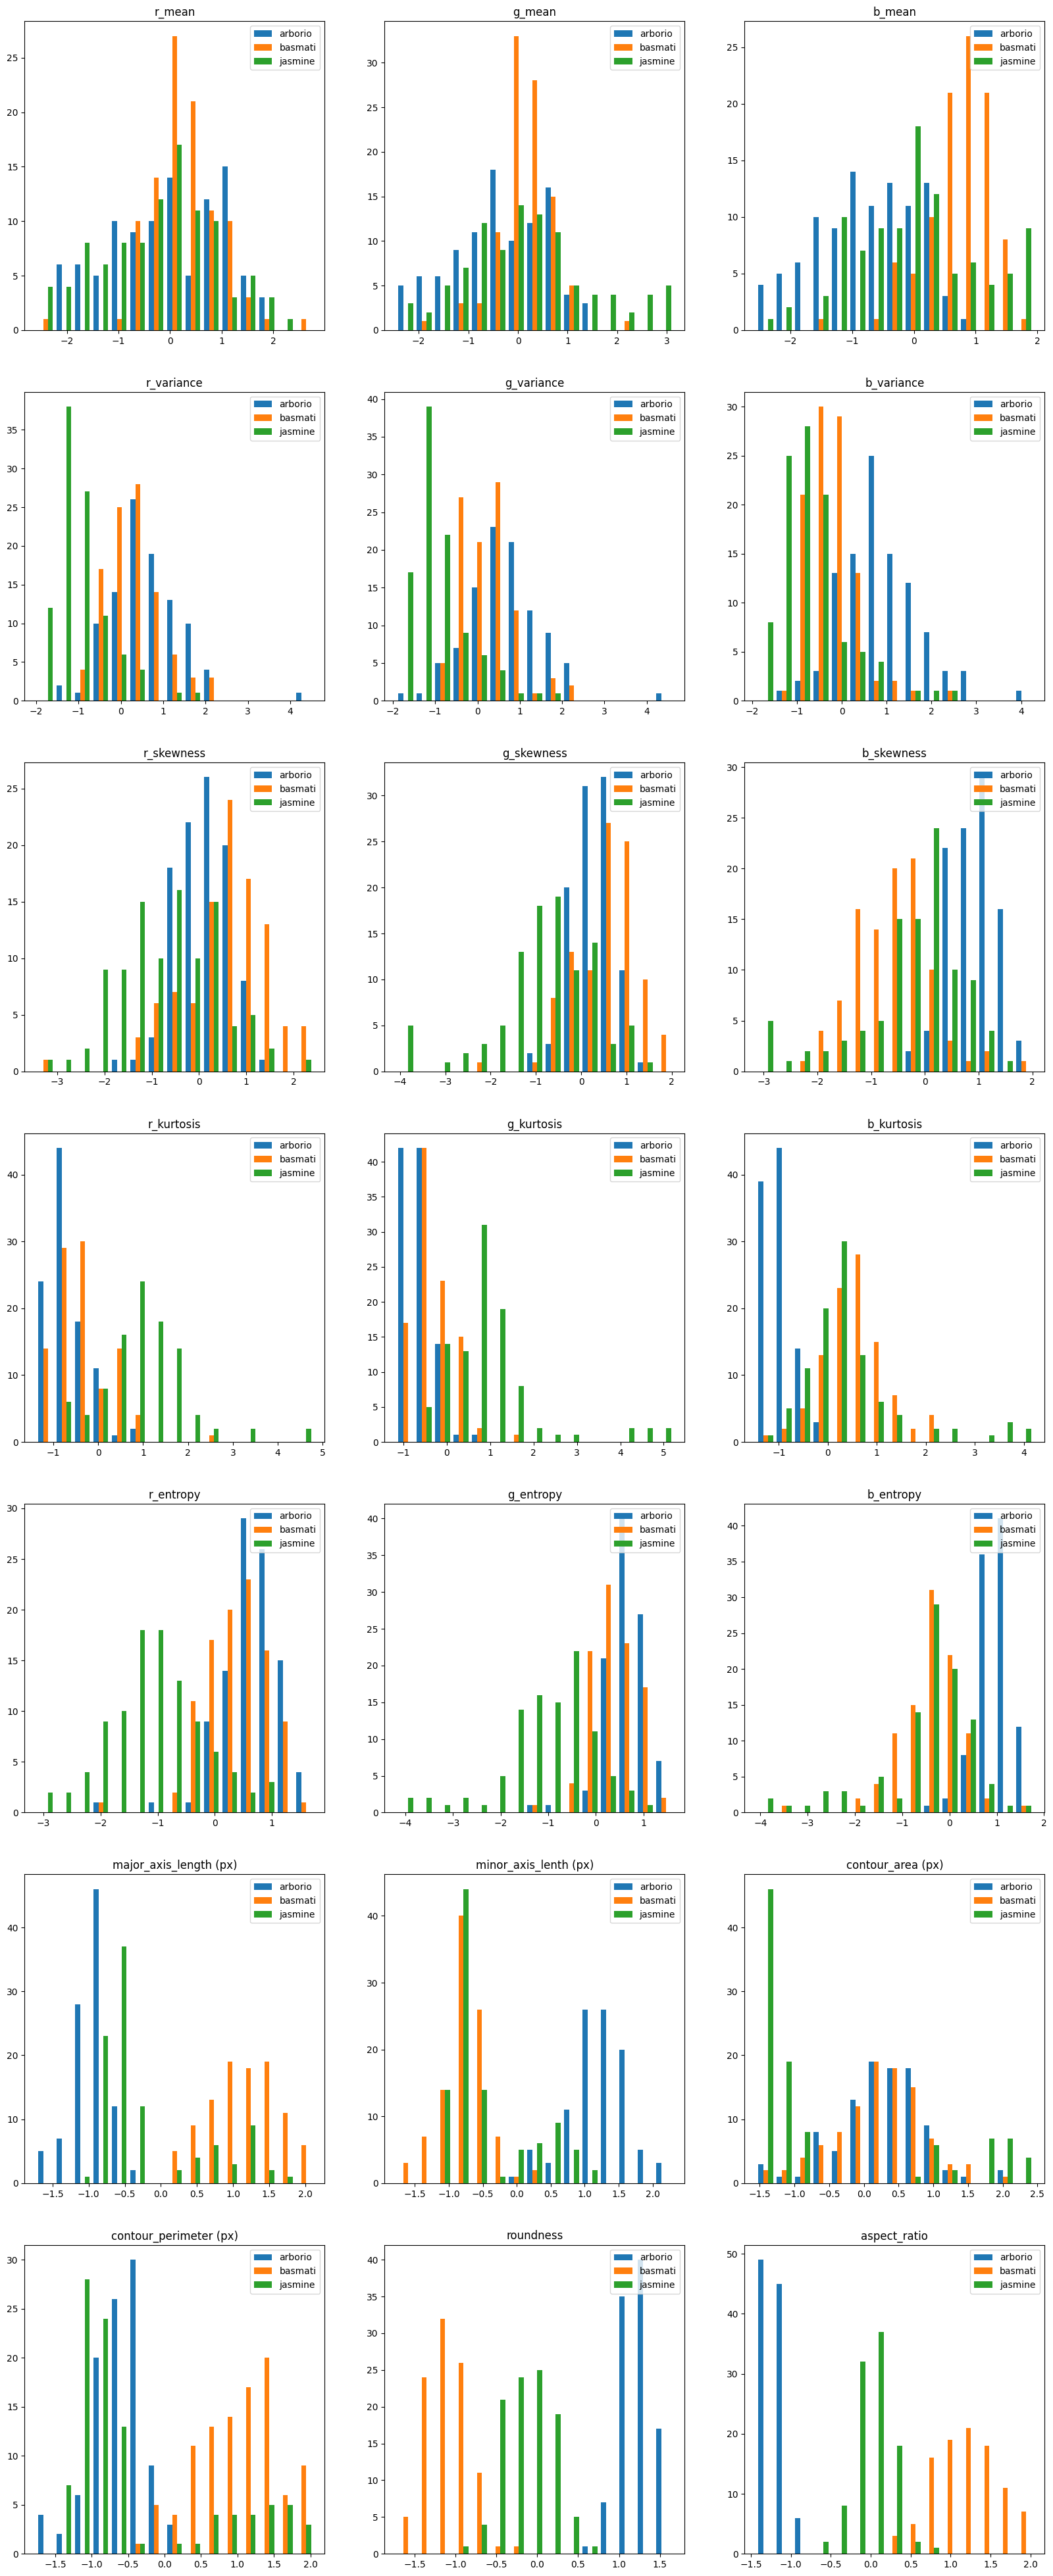

In [32]:
fig = plt.figure(figsize=(20, 50))

# setting values to rows and column variables
rows = math.ceil(len(cols)/3)
columns = 3

x = 0

for col in features.columns: 
    x = x + 1
    fig.add_subplot(rows, columns, x)

    plt.hist([arborio[col], basmati[col], jasmine[col]], bins=15, label=['arborio', 'basmati', 'jasmine'])
    plt.legend(loc='upper right')
    plt.title(col)

plt.show(fig)

## Plot pairplot (each feature against each feature and the label against each feature)

I tried using seaborn pairplot. The figures were so small and runing took a lot of time so I made a scatter plots of all features. 

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:09<00:00,  2.20it/s]


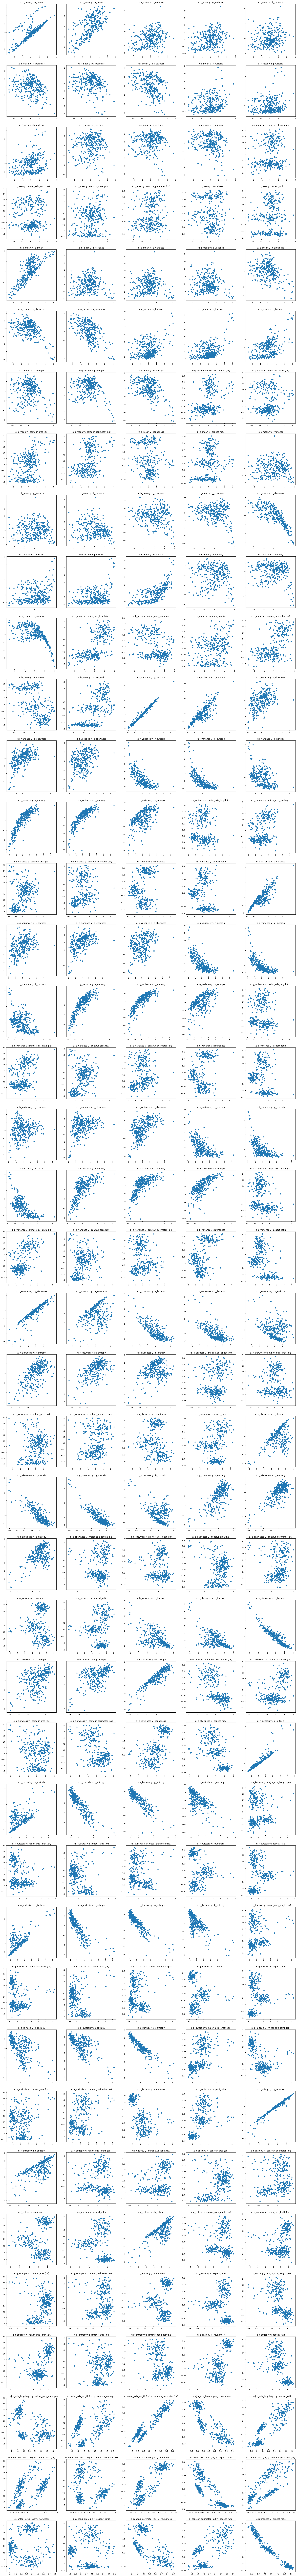

In [9]:
fig = plt.figure(figsize=(30, 300))

# setting values to rows and column variables
row_count = 47
column_count = 5

x = 0

columns = np.array(features.columns)
for col in tqdm(features.columns): 

    columns = np.delete(columns, 0)
    for c in columns:

        x = x + 1
        fig.add_subplot(row_count, column_count, x)
        plt.scatter(features[col], features[c])
        plt.title("x: " + col + " y : "+ c)

plt.show(fig)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 26.39it/s]


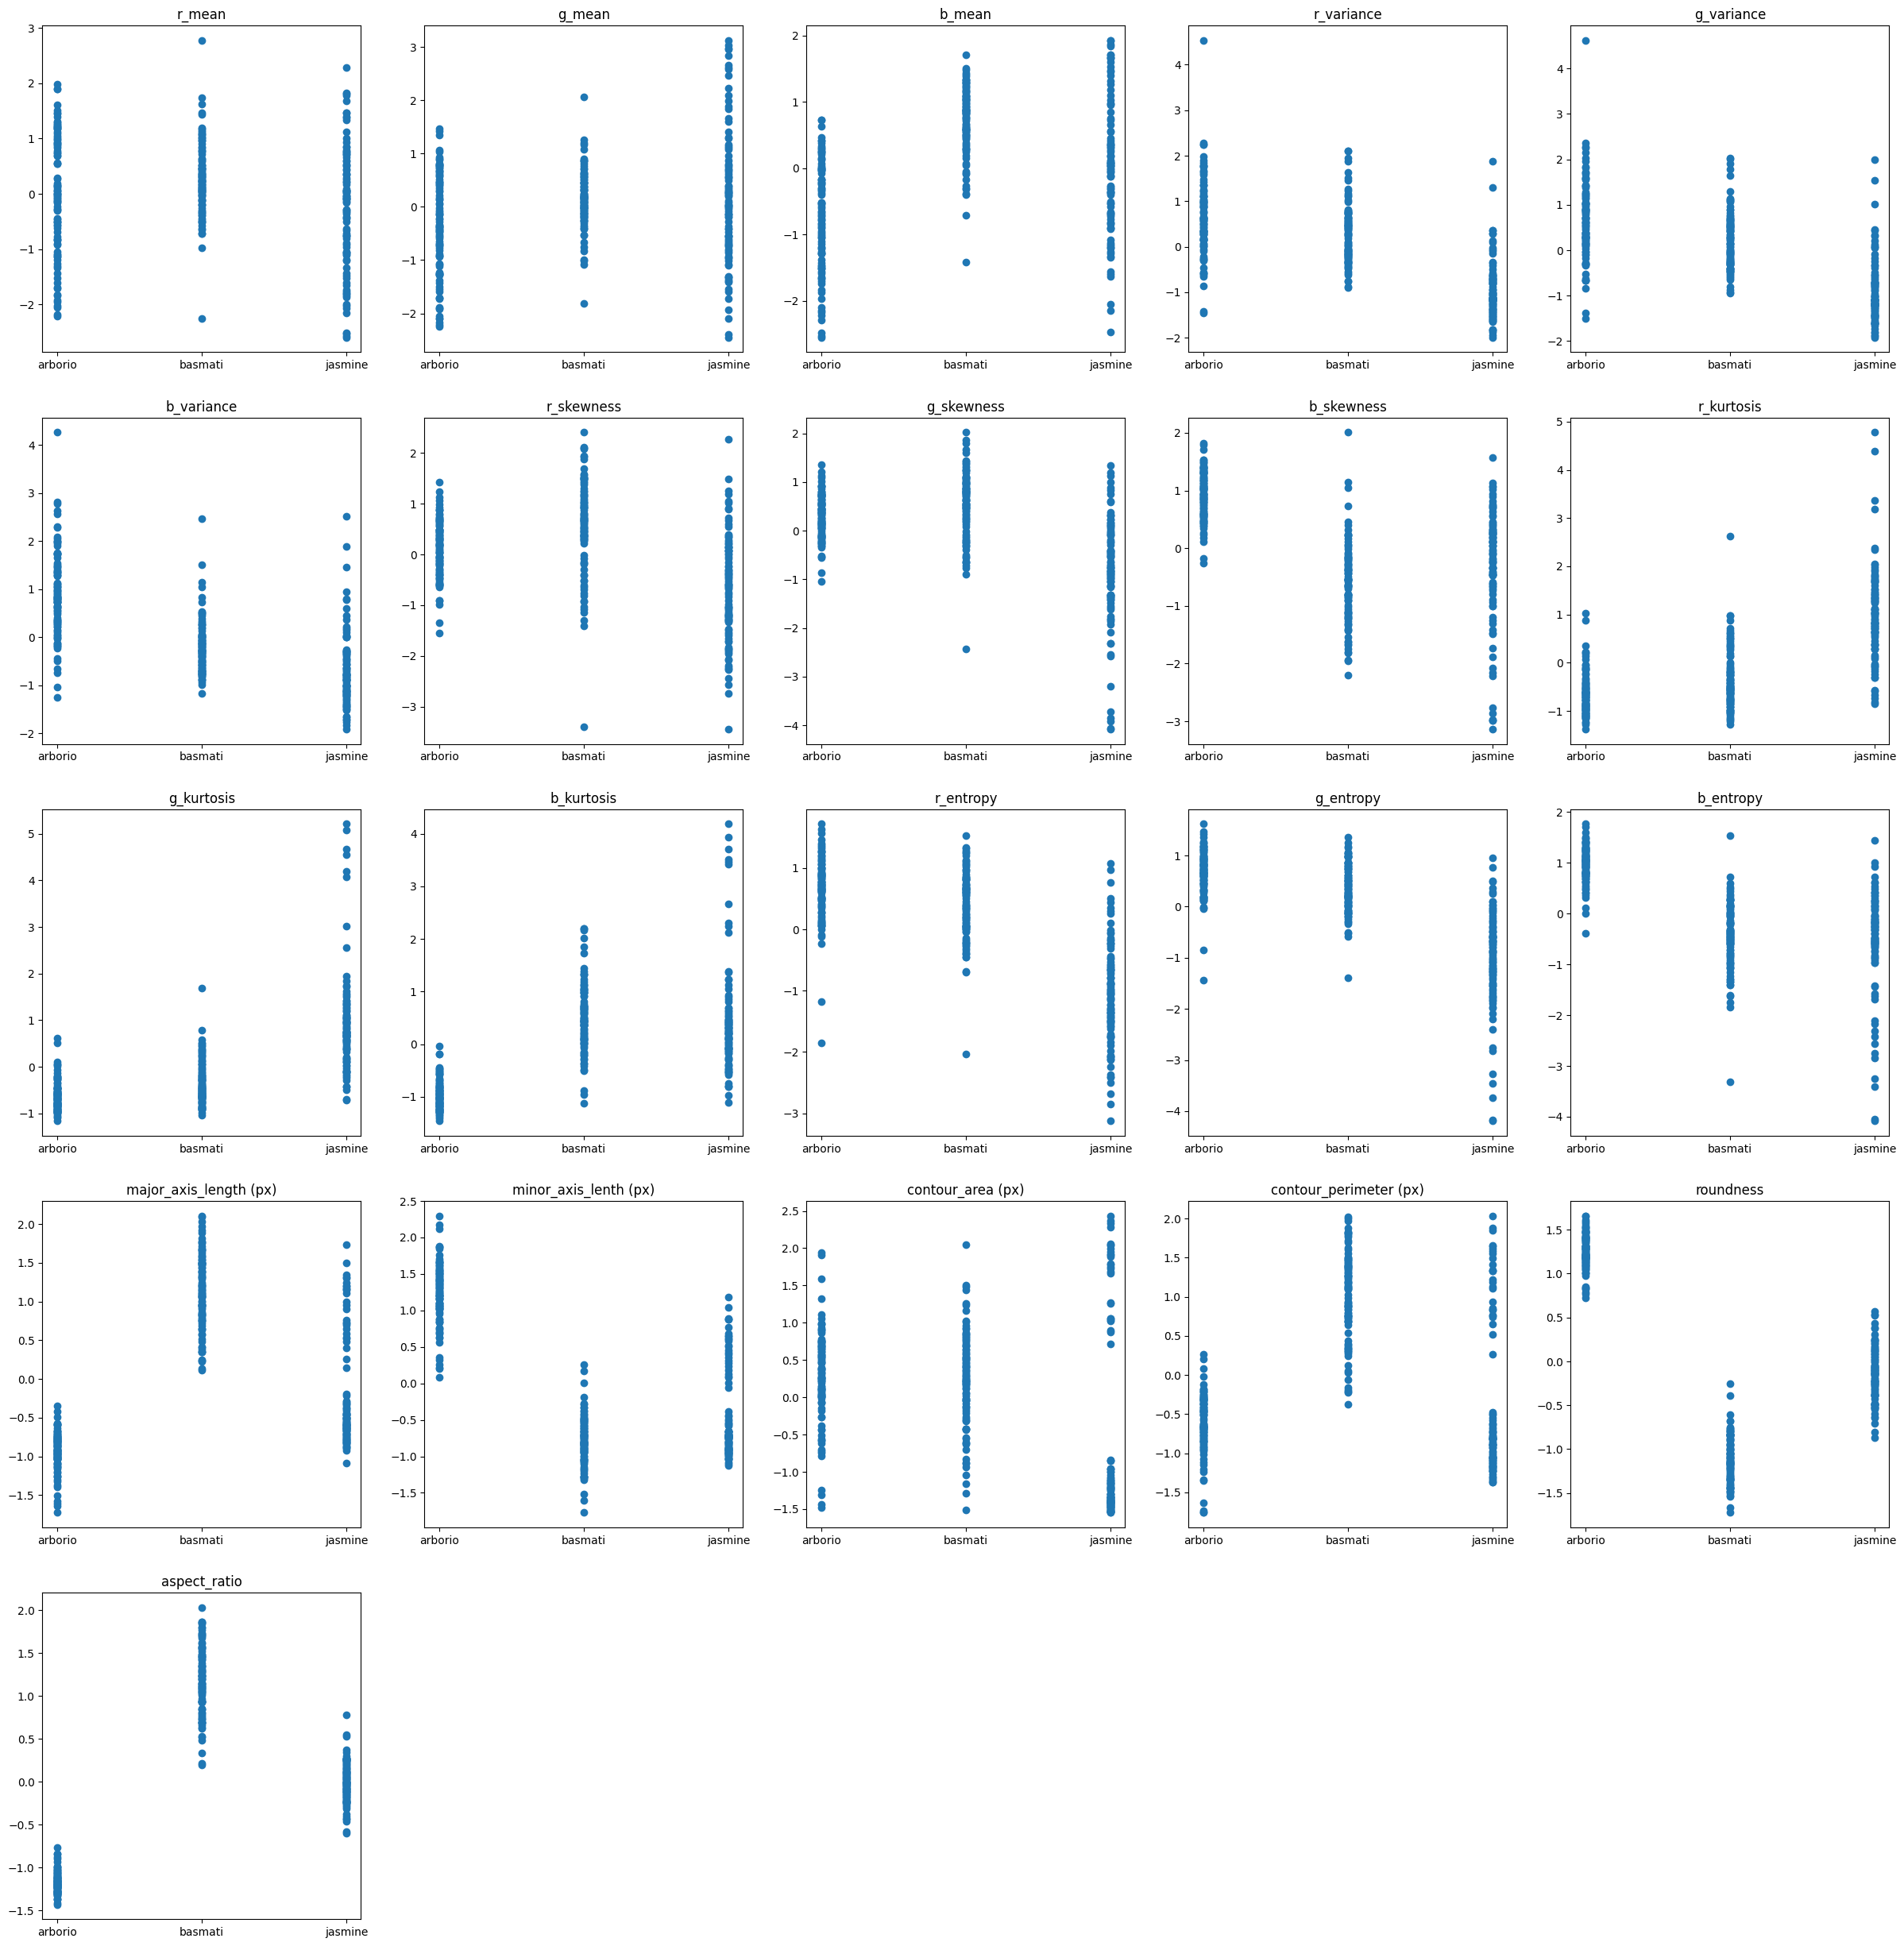

In [10]:
fig = plt.figure(figsize=(30, 300))

# setting values to rows and column variables
row_count = 47
column_count = 5

x = 0

columns = np.array(features.columns)
for c in tqdm(columns):

    x = x + 1
    fig.add_subplot(row_count, column_count, x)
    plt.scatter(training_data_scaled['rice_type'], features[c])
    plt.title(c)

plt.show(fig)

## Discuss your findings from the above figures, e.g. can you spot features which might be very useful in predicting the correct class?

Fron histograms -> aspect ratio and roundness. The scatterplots seem to support this the plots with aspect ratio or roundness in them seem to have most distinct clusters (though we cant be sure they are the correct clusters with out coloring in the rice types).
Colors don't have much effect in clustering. 

## Fit PCA using two components and plot the PCA figure with two components, color the data points according to their species

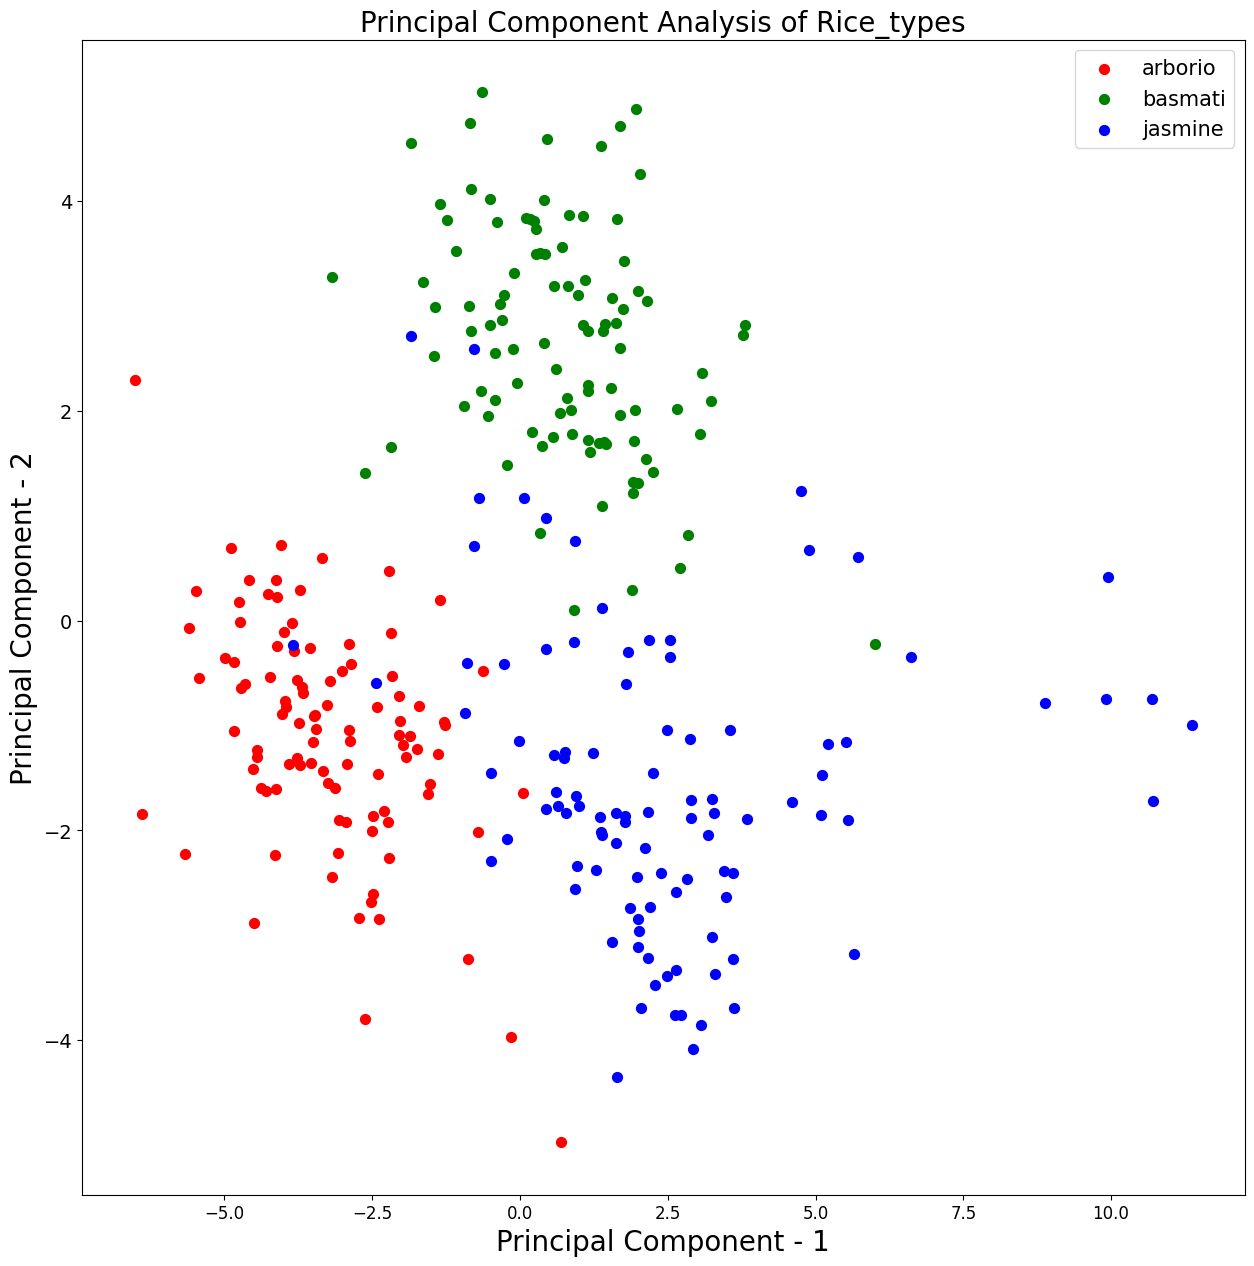

In [62]:
# create PCA model
pca = SD.PCA().fit(features)

# transform data into new space
df_pca = pd.DataFrame(pca.transform(features))

# add transformed data back to original data frame
training_scaled_pca = pd.concat([training_data_scaled['rice_type'], df_pca], axis=1)

fig = plt.figure(figsize=(15, 15))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)

plt.title("Principal Component Analysis of Rice_types",fontsize=20)
targets = ['arborio', 'basmati', 'jasmine']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = training_scaled_pca['rice_type'] == target
    plt.scatter(training_scaled_pca.loc[indicesToKeep, 0]
               , training_scaled_pca.loc[indicesToKeep, 1], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

plt.show(fig)

## Can you see any clusters in PCA? Does this figure give you any clues, how well you will be able to classify the image types? Explain.

We can see three distict clusters formed. We can propably 

## How many PCA components are needed to cover 99% of the variance?

In [34]:
# create PCA model
pca_99 = SD.PCA(n_components = 0.99).fit(features)

# transform data into new space
df_pca_99 = pd.DataFrame(pca_99.transform(features))

# How many components are in the formed dataframe
print(len(df_pca_99.columns))

10


# Model selection 
Select the best model for each classifier. Use 5-fold repeated cross validation with 3 repetitions (RepeatedKFold from sklearn). You can choose the hyperparameter ranges to use.

- Report the best hyperparameter or the best combination of hyperparameters.
- Plot the accuracy versus the hyperparameter/hyperparameter combination and highlight the best value.

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42)

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

## k Nearest Neighbors classifier
hyperparameters: 
   - k

In [37]:
#https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

k_range = 201

k_accuracy = []

for k in range(1, k_range):

    knn_model = KNeighborsClassifier(n_neighbors = k)

    knn_model.fit(X_train, y_train)

    knn_scores = cross_val_score(knn_model, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)

    k_accuracy.append(knn_scores.mean())

print('done')

done


In [105]:
maximum_value = max(k_accuracy)
print('Maximum accuracy is ', maximum_value)
print('This value is accived with k-value of ', k_accuracy.index(maximum_value)+1)

Maximum accuracy is  0.9899999999999999
This value is accived with k-value of  1


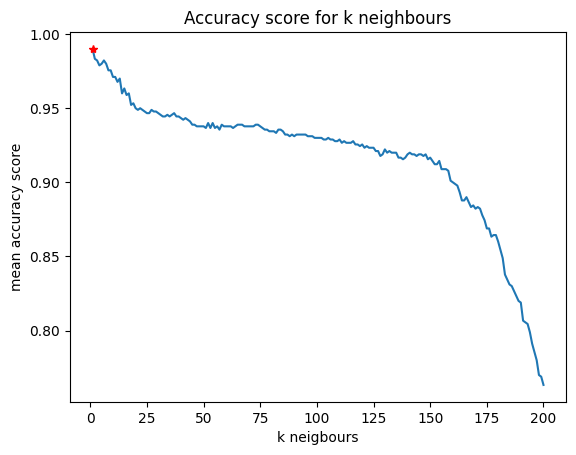

In [106]:
k_value = np.arange(1, k_range)

ymax = max(k_accuracy)
pos = k_accuracy.index(ymax)

plt.title("Accuracy score for k neighbours") 
plt.xlabel("k neigbours") 
plt.ylabel("mean accuracy score") 
plt.plot(k_value,k_accuracy) 

plt.plot(k_value[pos], k_accuracy[pos], 'r*')

plt.show()

## random forest
hyperparameters: 
   - max_depth
   - max_features
   
For random forest model, report the feature importance for each feature. Which features seem to be the most important? Does this correspond with the observations you made in the data exploration?

In [39]:
parameters = []
for mf in range(1, 22):
    for md in range(1, 11):
        parameters.append([mf, md])
print('done')

done


In [41]:
rf_accuracy = []
for p in tqdm(parameters):
    
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=p[1], max_features=p[0], random_state=42)
    
    rf_model.fit(X_train, y_train)
    
    rf_scores = cross_val_score(rf_model, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)

    rf_accuracy.append(rf_scores.mean())
print('done')

100%|█████████████████████████████████████████████████████████████████████████████| 210/210 [5:59:22<00:00, 102.68s/it]

done


In [60]:
    §§§§§§§§§§xsxz<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<lLLPÖmaximum_value = max(rf_accuracy)
print('Maximum accuracy is ', maximum_value)
max_params = parameters[rf_accuracy.index(maximum_value)]
print('This value is accived with max_features of ', max_params[0] , 'and max_depth of ', max_params[1])

Maximum accuracy is  0.991111111111111
This value is accived with max_features of  3 and max_depth of  7


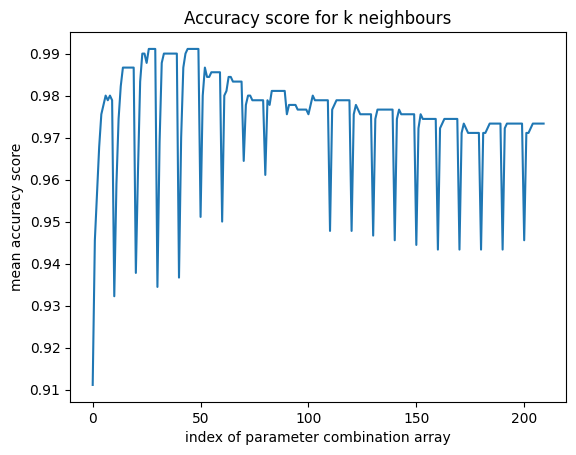

In [45]:
parameter_count = len(parameters)
parameter_inds = np.arange(0, parameter_count)

plt.title("Accuracy score for random forest") 
plt.xlabel("index of parameter combination array") 
plt.ylabel("mean accuracy score") 
plt.plot(parameter_inds, rf_accuracy) 
plt.show()

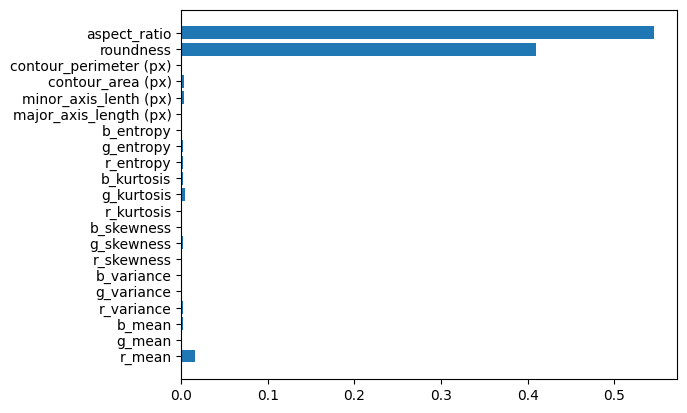

In [49]:
plt.barh(features.columns, rf_model.feature_importances_)
plt.show()

## MLP
Use one hidden layer and Early stopping. <br>
Hyperparameters:
   - number of neurons in the hidden layer
   - activation function: logistic sigmoid function and rectified linear unit function
   - solver: stochastic gradient descent and adam
   - validation_fraction: 0.1 and 0.5

In [92]:
activation=['logistic', 'relu']
solver=['adam', 'sgd']
validation_fraction=[0.1, 0.5]

parameters = []
for size in range(1, 22):
    for a in activation:
        for s in solver:
            for v in validation_fraction:
                parameters.append([size, a, s, v])
print('done')

done


In [93]:
mlp_accuracy = []
for p in tqdm(parameters):

    MLPmodel = MLPClassifier(
        random_state=42,
        early_stopping=True,
        hidden_layer_sizes=(p[0],),
        activation=p[1],
        solver=p[2],
        validation_fraction=p[3],
        )

    # Fit data onto the model
    MLPmodel.fit(X_train.values,y_train)
        
    mlp_scores = cross_val_score(MLPmodel, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)

    mlp_accuracy.append(mlp_scores.mean())
    
print('done')

100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [01:33<00:00,  1.80it/s]

done


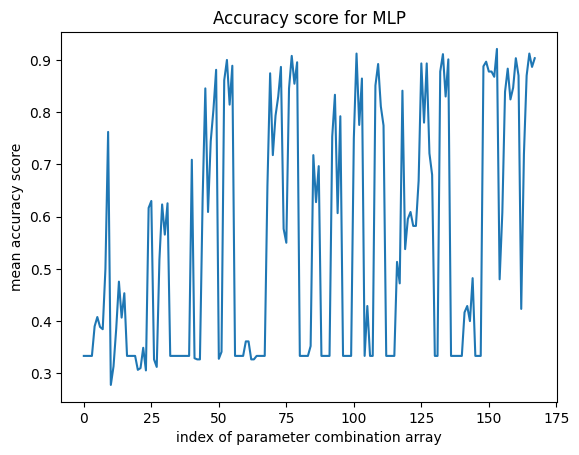

In [94]:
parameter_count = len(parameters)
parameter_inds = np.arange(0, parameter_count)

plt.title("Accuracy score for MLP") 
plt.xlabel("index of parameter combination array") 
plt.ylabel("mean accuracy score") 
plt.plot(parameter_inds, mlp_accuracy) 
plt.show()

In [95]:
maximum_value = max(mlp_accuracy)
print('Maximum accuracy is ', maximum_value)
max_params = parameters[mlp_accuracy.index(maximum_value)]
print(max_params)

Maximum accuracy is  0.9211111111111111
[20, 'logistic', 'adam', 0.5]


## Ponder the model selection process. What things should be considered when selecting the model to be used?